In [2]:
import pandas as pd

In [3]:
DATA_PATH = "../data/bulletins.parquet"

In [4]:
df = pd.read_parquet(DATA_PATH)
df.describe()

,ID_DELEGACIA,ANO_BO,NUM_BO,NUMERO_LOGRADOURO,CONT_OBJETO,QUANTIDADE_OBJETO
count,1.756344e+07,1.756344e+07,1.756344e+07,1.687374e+07,1.756344e+07,1.181062e+07
mean,1.185751e+05,2.010167e+03,7.062746e+04,2.859517e+04,3.917160e+00,9.408681e+05
std,2.520562e+05,3.702890e+00,2.504173e+05,4.756022e+06,4.448933e+00,2.927711e+09
min,1.000400e+04,2.002000e+03,1.000000e+00,-2.365000e+03,1.000000e+00,0.000000e+00
25%,1.035700e+04,2.007000e+03,1.304000e+03,0.000000e+00,1.000000e+00,1.000000e+00
50%,3.020300e+04,2.010000e+03,3.247000e+03,2.200000e+01,3.000000e+00,1.000000e+00
75%,7.039400e+04,2.014000e+03,6.641000e+03,4.340000e+02,5.000000e+00,1.000000e+00
max,9.909000e+05,2.022000e+03,2.523745e+06,1.145877e+09,2.550000e+02,1.000000e+13


In [7]:
df.columns

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'CIDADE', 'ANO_BO', 'NUM_BO', 'DESCR_SOLUCAO', 'DESCR_PROVIDENCIA',
       'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC',
       'NOME_MUNICIPIO_CIRC', 'DESCR_TIPO_BO', 'DATA_OCORRENCIA_BO',
       'HORA_OCORRENCIA_BO', 'DESCRICAO_APRESENTACAO', 'DATAHORA_REGISTRO_BO',
       'DATA_COMUNICACAO_BO', 'DATAHORA_IMPRESSAO_BO', 'DESCR_PERIODO',
       'AUTORIA_BO', 'FLAG_INTOLERANCIA', 'TIPO_INTOLERANCIA',
       'FLAG_FLAGRANTE', 'FLAG_STATUS', 'RUBRICA', 'DESCR_CONDUTA',
       'DESDOBRAMENTO', 'BAIRRO', 'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL',
       'CEP', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'CONT_OBJETO', 'DESCR_MODO_OBJETO', 'DESCR_TIPO_OBJETO',
       'DESCR_SUBTIPO_OBJETO', 'DESCR_UNIDADE', 'QUANTIDADE_OBJETO'],
      dtype='object')

In [14]:
bike_categories = [cat
                   for cat
                   in df.DESCR_SUBTIPO_OBJETO.unique()
                   if 'Bicicleta' in cat]
bike_categories


['Bicicleta                                                   ',
 'Bicicleta Elétrica                                          ']

In [15]:
bike_df = df[df.DESCR_SUBTIPO_OBJETO.isin(bike_categories)]

In [20]:
print(f"{len(bike_df) / len(df) :.2%}")

0.78%


<AxesSubplot:xlabel='ANO_BO'>

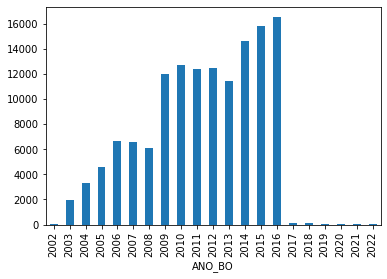

In [24]:
bike_df.groupby('ANO_BO').NUM_BO.count().plot(kind='bar')

<AxesSubplot:xlabel='ANO_BO'>

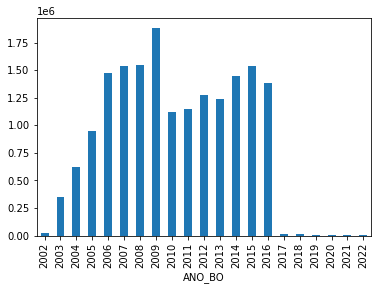

In [25]:
df.groupby('ANO_BO').NUM_BO.count().plot(kind='bar')

In [28]:
df.ANO_BO.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2002, 2003, 2004])

In [32]:
df[df.ANO_BO == 2021].ANO_BO.count()

3323

In [39]:
bike_df.iloc[5].OBSERVACAO

AttributeError: 'Series' object has no attribute 'OBSERVACAO'

In [41]:
bike_df.LOGRADOURO.nunique()

32811

In [50]:
i = 60
bike_df.LOGRADOURO.value_counts()[i:i+25]

AVENIDA PEDRO ALVARES CABRAL           64
AV JOAQUINA RAMALHO                    64
AVENIDA SIQUEIRA CAMPOS                64
RUA BARÃO DO RIO BRANCO                64
EST SANTA ISABEL                       63
RUA IPIRANGA                           63
R JOAO PESSOA                          62
AV JERONIMO GONCALVES                  61
RUA BERNARDINO DE CAMPOS               60
AVENIDA RUI BARBOSA                    60
AV AFONSO PENA                         59
RUA RIO DE JANEIRO                     59
AV. BRASIL                             58
RUA FREDERICO MACHADO                  58
AV VEREADOR NARCISO YAGUE GUIMARAES    58
R DO MANIFESTO                         58
R CAMPOS SALES                         58
R BERNARDINO DE CAMPOS                 58
AV MIRASSOLANDIA                       58
AV SANTOS DUMONT                       57
AV BRIGADEIRO LUIS ANTONIO             57
RUA CAMPOS SALES                       56
RODOVIA DOS IMIGRANTES                 55
RUA TREZE DE MAIO                 

In [53]:
bike_df.DESCR_TIPOLOCAL.value_counts()

Residência                         53038
Via pública                        46479
Comércio e serviços                14966
Estabelecimento de ensino           4945
Condominio Residencial              3642
Lazer e recreação                   2475
Saúde                               1568
Centro Comerc./Empresarial          1491
Repartição Pública                  1448
Unidade rural                       1111
Terminal/Estação                     785
Estabelecimento industrial           750
Templo e afins                       699
Area não ocupada                     625
Shopping Center                      594
Restaurante e afins                  573
Rodovia/Estrada                      380
Estabelecimento bancário             375
Outros                               356
Escritório                           350
Serviços e bens públicos             342
Entidade assistencial                316
Hospedagem                           203
Condominio Comercial                 187
Estrada de ferro

In [55]:
highway_bike_df = bike_df[bike_df.DESCR_TIPOLOCAL == 'Rodovia/Estrada']

<AxesSubplot:xlabel='ANO_BO'>

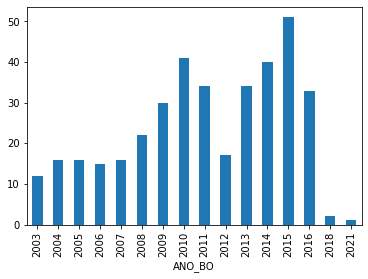

In [56]:
highway_bike_df.groupby('ANO_BO').NUM_BO.count().plot(kind='bar')

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DESCR_SOLUCAO,DESCR_PROVIDENCIA,NOME_DEPARTAMENTO_CIRC,...,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,CONT_OBJETO,DESCR_MODO_OBJETO,DESCR_TIPO_OBJETO,DESCR_SUBTIPO_OBJETO,DESCR_UNIDADE,QUANTIDADE_OBJETO
8291165,30122,DEMACRO,DEL.SEC.DIADEMA,01º D.P. DIADEMA,DIADEMA,2008,7554,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DEMACRO,...,RODOVIA DOS IMIGRANTES,0,None,None,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,NaN
15695711,130405,DEINTER 1 - SAO JOSE DOS CAMPOS,DEL.SEC.TAUBATÉ,DEL.POL.PINDAMONHANGABA,PINDAMONHANGABA,2007,2824,BO PARA INVESTIGAÇÃO,NaN,DEINTER 1 - SAO JOSE DOS CAMPOS,...,ESTRADA PINHÃO DO BORBA,0,None,None,3,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,1.0
15766360,130415,DEINTER 1 - SAO JOSE DOS CAMPOS,DEL.SEC.TAUBATÉ,DEL.POL.CAMPOS DO JORDÃO,CAMPOS DO JORDAO,2013,1368,BO PARA INVESTIGAÇÃO,NaN,DEINTER 1 - SAO JOSE DOS CAMPOS,...,RODOVIA MONTEIRO LOBATO,0,0,0,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,1.0
13492417,70811,DEINTER 9 - PIRACICABA,DEL.SEC.LIMEIRA,02º D.P. LIMEIRA,LIMEIRA,2015,782,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DEINTER 9 - PIRACICABA,...,RODOVIA SP 348,161,"-22,544572482","-47,4614642829999",1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0
10350627,30408,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.JANDIRA,JANDIRA,2012,1941,BO PARA INVESTIGAÇÃO,NaN,DEMACRO,...,VIA DE ACESSO JOAO DE GOES,0,"-23,5129238546657","-46,9295801011526",1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,NaN
14335397,100430,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,06º D.P. RIBEIRAO PRETO,RIBEIRAO PRETO,2011,315,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DEINTER 3 - RIBEIRAO PRETO,...,AV BANDEIRANTES,0,"-21,1671222089044","-47,9040829197896",1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,2.0
15386648,130204,DEINTER 1 - SAO JOSE DOS CAMPOS,DEL.SEC.GUARATINGUETA,DEL.POL.LORENA,LORENA,2014,1236,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DEINTER 1 - SAO JOSE DOS CAMPOS,...,RUA PREFEITO ARISTEU VIEIRA VILELA,0,None,None,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0
9185777,30211,DEMACRO,DEL.SEC.GUARULHOS,DEL.POL.STA ISABEL,S.ISABEL,2004,1075,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DEMACRO,...,"ROD. PRESIDENTE DUTRA, KM 184",0,None,None,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0
14547517,100908,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.ARARAQUARA,DEL.SEC.ARARAQUARA PLANTÃO,ARARAQUARA,2009,2501,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,DEINTER 3 - RIBEIRAO PRETO,...,ROD SP 255,0,None,None,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,NaN
15785724,130426,DEINTER 1 - SAO JOSE DOS CAMPOS,DEL.SEC.TAUBATÉ,03º D.P. PINDAMONHANGABA,PINDAMONHANGABA,2009,30,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DEINTER 1 - SAO JOSE DOS CAMPOS,...,RODOVIA MANOEL CESAR RIBEIRO,475,None,None,2,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0
